In [1]:
import scanpy as sc
import pandas as pd
import statistics
import sys
import getopt
import os
import matplotlib.pyplot as mp
import anndata as ad
import time
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
sc.settings.figdir = "../results/figures/"
print(ad.__version__)
print(sc.__version__)

0.10.7
1.10.1


In [3]:
filenames = "input.txt"
files = open(filenames, "r")
files = [i.strip() for i in files]
print(len(files))
files

21


['/scale/gr01/shared/jjakobsson/processed/MN06_PTERV/1_counts/MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b1/outs/filtered_feature_bc_matrix',
 '/scale/gr01/shared/jjakobsson/processed/MN06_PTERV/1_counts/MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b2/outs/filtered_feature_bc_matrix',
 '/scale/gr01/shared/jjakobsson/processed/MN06_PTERV/1_counts/MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d30_b1/outs/filtered_feature_bc_matrix',
 '/scale/gr01/shared/jjakobsson/processed/MN06_PTERV/1_counts/MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d30_b2/outs/filtered_feature_bc_matrix',
 '/scale/gr01/shared/jjakobsson/processed/MN06_PTERV/1_counts/MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b1/outs/filtered_feature_bc_matrix',
 '/scale/gr01/shared/jjakobsson/processed/MN06_PTERV/1_counts/MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b2/outs/filtered_feature_bc_matrix',
 '/scale/gr01/shared/jjakobsson/processe

In [4]:
samplesheet = pd.read_table("samplesheet_QC_mn06_pterv_round2.txt")
samplesheet = samplesheet.reset_index()
samplesheet = samplesheet.set_index("sample_id")
samplesheet

,index,sample_name,raw_path,condition,rep,batch,day
sample_id,,,,,,,
MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b1,0,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep3,b1,15
MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b2,1,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep3,b2,15
MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d30_b1,2,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep3,b1,30
MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d30_b2,3,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep3,b2,30
MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b1,4,MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g2,Rep3,b1,15
MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b2,5,MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g2,Rep3,b2,15
MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d30_b1,6,MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g2,Rep3,b1,30
MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d30_b2,7,MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g2,Rep3,b2,30
MN06_KD_Rep4_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b1,8,MN06_KD_Rep4_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep4,b1,15


In [5]:
adatas = []
i = 0

for file in files:
    sample_name = file.split("/")[8]
    adata = sc.read_10x_mtx(file, var_names = "gene_symbols", cache = True)
    adata.obs["sample_name"] = sample_name
    adata.obs["condition"] = samplesheet.loc[sample_name]["condition"]
    adata.obs["day"] = samplesheet.loc[sample_name]["day"]
    adata.obs["rep"] = samplesheet.loc[sample_name]["rep"]
    adata.obs["batch"] = samplesheet.loc[sample_name]["batch"]
    adatas.append(adata)
    i = i+1
    print(str(i) + "/21") 

/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


1/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


2/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


3/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


4/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


5/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


6/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


7/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


8/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


9/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


10/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


11/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


12/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


13/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


14/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


15/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


16/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


17/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


18/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


19/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


20/21
21/21


/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [6]:
# Number of cells
sum([len(adata) for adata in adatas])

128937

In [7]:
i = 0
adatas_raw = adatas
#adatas = adatas_raw
for adata in adatas:
    adata.var_names_make_unique()
    sc.pp.filter_genes(adata, min_cells = 3)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata.var["ribo"] = adata.var_names.str.startswith("RPS", "RPL")
    sc.pp.calculate_qc_metrics(adata, qc_vars = ["mt", "ribo"], percent_top = None, log1p = False, inplace = True)
    mean_counts = statistics.mean(adata.obs.n_genes_by_counts)
    sd_counts = statistics.stdev(adata.obs.n_genes_by_counts)
    sc.pp.scrublet(adata)
    i = i + 1
    print(str(i) + "/21 " + adata.obs.sample_name.unique().item() + " : " + str(len(adata)))

1/21 MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b1 : 6407
2/21 MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b2 : 6257
3/21 MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d30_b1 : 6277
4/21 MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d30_b2 : 5943
5/21 MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b1 : 5593
6/21 MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b2 : 6126
7/21 MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d30_b1 : 5084
8/21 MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d30_b2 : 7082
9/21 MN06_KD_Rep4_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b1 : 6596
10/21 MN06_KD_Rep4_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b2 : 6456
11/21 MN06_KD_Rep4_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d30_b1 : 6712
12/21 MN06_KD_Rep4_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b1 : 5844
13/21 MN06_KD_Rep4_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b2 : 6719
14/21 MN

In [8]:
adata = ad.concat(adatas, keys = [adata.obs.sample_name[1] for adata in adatas], label = "sample_name", join="outer")
adata.layers["counts"] = adata.X 
adata.obs_names_make_unique()

/tmp/ipykernel_1219474/3893152556.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata = ad.concat(adatas, keys = [adata.obs.sample_name[1] for adata in adatas], label = "sample_name", join="outer")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
df = sc.get.obs_df(adata, ['sample_name','condition','day','rep','batch','n_genes_by_counts', "total_counts", "pct_counts_mt"])
df["sample_name"] = df.sample_name.astype(str)
df.to_csv('../results/tables/preQC_cellMeta.csv')
df

,sample_name,condition,day,rep,batch,n_genes_by_counts,total_counts,pct_counts_mt
AAACCCAAGCGTACAG-1,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,g1,15,Rep3,b1,3069,6102.0,0.000000
AAACCCAAGTGATAAC-1,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,g1,15,Rep3,b1,2211,3877.0,9.698220
AAACCCACACATATCG-1,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,g1,15,Rep3,b1,1182,1522.0,0.065703
AAACCCACACCAGCCA-1,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,g1,15,Rep3,b1,1454,2069.0,0.048333
AAACCCACACTGTCGG-1,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,g1,15,Rep3,b1,2618,4848.0,0.061881
...,...,...,...,...,...,...,...,...
TTTGTTGAGCACAAAT-1-1,MN06_LacZ_Rep4_snRNA_org_hiPS6_LV3599_LINC0066...,LacZ,30,Rep4,b1,2059,4325.0,0.554913
TTTGTTGCAACCAACT-1,MN06_LacZ_Rep4_snRNA_org_hiPS6_LV3599_LINC0066...,LacZ,30,Rep4,b1,3447,7716.0,0.000000
TTTGTTGCAGAACTTC-1,MN06_LacZ_Rep4_snRNA_org_hiPS6_LV3599_LINC0066...,LacZ,30,Rep4,b1,1793,3285.0,0.000000
TTTGTTGGTCGAAACG-1,MN06_LacZ_Rep4_snRNA_org_hiPS6_LV3599_LINC0066...,LacZ,30,Rep4,b1,1393,2184.0,0.045788


In [10]:
import statistics
with open("../results/tables/MN06_LINC00662_QC.txt","a") as fout:
    for i in range(0,len(adatas)):
        fout.write(str(i) + "/21 " + adatas[i].obs.sample_name.unique().item() + " pre QC: " + str(len(adatas[i].obs_names)) + "\n")
        fout.write(adatas[i].obs.sample_name.unique().item() + " pre QC: " + str(len(adatas[i])) + "\n")
        sc.pp.filter_cells(adatas[i], min_genes = 500, inplace = True)
        fout.write("Discading cells with less than 500 genes\n")
        fout.write(adatas[i].obs.sample_name.unique().item() + " with > 500 genes: " + str(len(adatas[i])) + "\n")
        mean_counts = statistics.mean(adatas[i].obs.total_counts)
        sd_counts = statistics.stdev(adatas[i].obs.total_counts)
        discarded = ((adatas[i].obs.total_counts  < (mean_counts - (sd_counts * 2))) | (adatas[i].obs.total_counts > (mean_counts + (sd_counts * 2))))
        keep_cells = [cell for cell in (adatas[i].obs_names.to_list()) if cell not in discarded[discarded].index.to_list()]
        adatas[i] = adatas[i][keep_cells, :]
        fout.write("Discarding cells with < mean-2sd counts and > mean+2sd counts. Total: " + str(len(discarded[discarded].index.to_list())) + ". Kept: " + str(len(keep_cells)) + " or " + str(len(adatas[i])) + "\n")
        discarded = (adatas[i].obs.pct_counts_mt > 2)
        keep_cells = [cell for cell in (adatas[i].obs_names.to_list()) if cell not in discarded[discarded].index.to_list()]
        adatas[i] = adatas[i][keep_cells, :]
        fout.write("Discarding cells with >2 mt_counts: " + str(len(discarded[discarded].index.to_list())) + ". Kept: " + str(len(adatas[i])) + "\n")
        discarded = (adatas[i].obs.predicted_doublet == True)
        keep_cells = [cell for cell in (adatas[i].obs_names.to_list()) if cell not in discarded[discarded].index.to_list()]
        adatas[i] = adatas[i][keep_cells, :]
        fout.write("Discarding doublets: " + str(len(discarded[discarded].index.to_list())) + ". Kept: " + str(len(adatas[i])) + "\n")
        fout.write(adatas[i].obs.sample_name.unique().item() + " post QC: " + str(len(adatas[i])) + "\n")


In [11]:
print(len(adatas))
adatas = [a for a in adatas if len(a) > 50]
print(len(adatas))

21
21


In [12]:
adata = ad.concat(adatas, keys = [adata.obs.sample_name[1] for adata in adatas], label = "sample_name", join="outer")
adata.layers["counts"] = adata.X 
adata.obs_names_make_unique()

/tmp/ipykernel_1219474/3893152556.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata = ad.concat(adatas, keys = [adata.obs.sample_name[1] for adata in adatas], label = "sample_name", join="outer")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [13]:
from pathlib import Path
from scipy import io

adata.layers["raw_counts"] = adata.X
adata.write_h5ad("./h5s/MN06_org_adata_preumap.h5")
#io.mmwrite('./data_scanpy/counts_unscaled.mtx',adata.layers['counts'])

In [5]:
adata = ad.read_h5ad("./h5s/MN06_org_adata_preumap.h5")

In [6]:
sc.pp.normalize_total(adata, target_sum = 1e6)
sc.pp.log1p(adata)
adata.layers["normalized"] = adata.X 
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

In [7]:
adata.obs.batch = adata.obs.batch.astype('category')
adata.obs["batch_num"] = adata.obs.batch.cat.codes

adata.obs.rep = adata.obs.rep.astype('category')
adata.obs["rep_num"] = adata.obs.rep.cat.codes

sc.pp.scale(adata, max_value = 10)
adata.layers["scaled"] = adata.X 
sc.tl.pca(adata, svd_solver = "arpack")
sc.pp.neighbors(adata, n_neighbors = 15, n_pcs = 20)
sc.tl.leiden(adata, resolution = 0.1, random_state = 0, n_iterations = -1, directed = False, flavor = "igraph")
sc.tl.paga(adata)
sc.pl.paga(adata, plot = False)
sc.tl.umap(adata, init_pos = "paga")

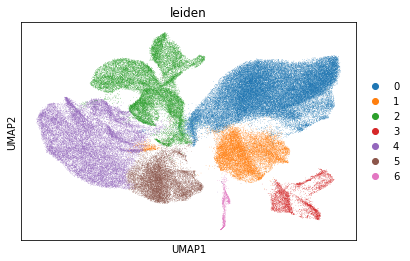

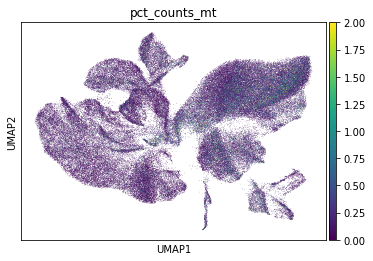

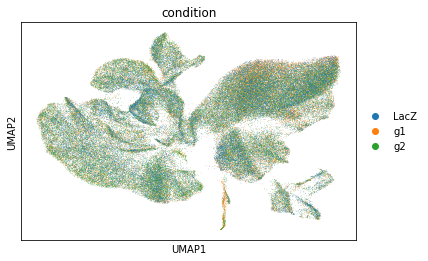

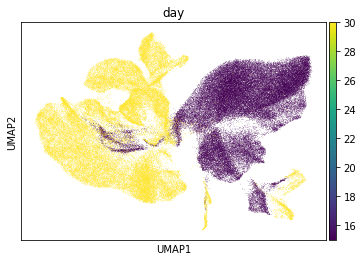

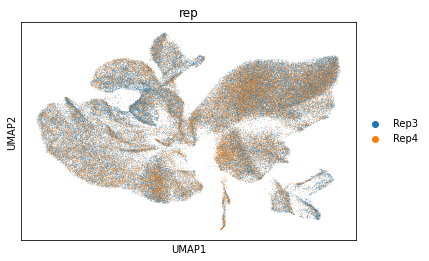

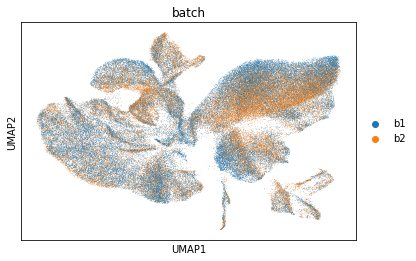

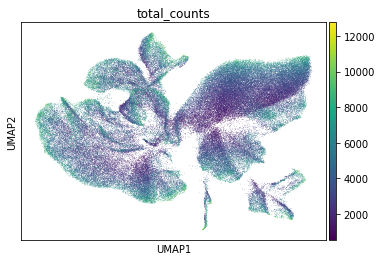

In [8]:
sc.pl.umap(adata, color = "leiden", save = "_nointegration_clusters.pdf")
sc.pl.umap(adata, color = 'pct_counts_mt', save = "_nointegration_mt.pdf")
sc.pl.umap(adata, color = 'condition', save = "_nointegration_condition.pdf")
sc.pl.umap(adata, color = 'day', save = "_nointegration_day.pdf")
sc.pl.umap(adata, color = 'rep', save = "_nointegration_rep.pdf")
sc.pl.umap(adata, color = 'batch', save = "_nointegration_batch.pdf")
sc.pl.umap(adata, color = 'total_counts', save = "_nointegration_counts.pdf")

In [9]:
with open("MN06_org_samples_mean_count_genes.tab", "w") as fout:
    for sample in adata.obs.sample_name.unique():
        fout.write(sample + "\t" + str(samplesheet.loc[sample]["condition"]) + "\t" + str(len(adata[adata.obs.sample_name.isin([str(sample)])].obs_names.unique())) + "\t" + str(adata[adata.obs.sample_name.isin([str(sample)])].obs.n_genes_by_counts.mean()) + "\t" + str(adata[adata.obs.sample_name.isin([str(sample)])].obs.total_counts.mean()) + "\n")

In [10]:
#adata = ad.read_h5ad("./h5s/MN06_org_adata_umap_integration.h5")
adata.write_h5ad("./h5s/MN06_org_adata_umap_nointegration.h5")

In [11]:
samplesheet

,index,sample_name,raw_path,condition,rep,batch,day
sample_id,,,,,,,
MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b1,0,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep3,b1,15
MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b2,1,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep3,b2,15
MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d30_b1,2,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep3,b1,30
MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d30_b2,3,MN06_KD_Rep3_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep3,b2,30
MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b1,4,MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g2,Rep3,b1,15
MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d15_b2,5,MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g2,Rep3,b2,15
MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d30_b1,6,MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g2,Rep3,b1,30
MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_g2_CRISPRi_d30_b2,7,MN06_KD_Rep3_snRNA_org_hiPS6_LV3622_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g2,Rep3,b2,30
MN06_KD_Rep4_snRNA_org_hiPS6_LV3621_LINC00662_g1_CRISPRi_d15_b1,8,MN06_KD_Rep4_snRNA_org_hiPS6_LV3621_LINC00662_...,/scale/gr01/shared/jjakobsson/backup/rawdatase...,g1,Rep4,b1,15


2025-09-26 14:50:07,494 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-09-26 14:50:17,118 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-09-26 14:50:17,448 - harmonypy - INFO - Iteration 1 of 10
2025-09-26 14:50:46,057 - harmonypy - INFO - Iteration 2 of 10
2025-09-26 14:51:14,980 - harmonypy - INFO - Iteration 3 of 10
2025-09-26 14:51:42,525 - harmonypy - INFO - Iteration 4 of 10
2025-09-26 14:52:08,866 - harmonypy - INFO - Iteration 5 of 10
2025-09-26 14:52:32,867 - harmonypy - INFO - Iteration 6 of 10
2025-09-26 14:52:59,282 - harmonypy - INFO - Iteration 7 of 10
2025-09-26 14:53:07,018 - harmonypy - INFO - Converged after 7 iterations


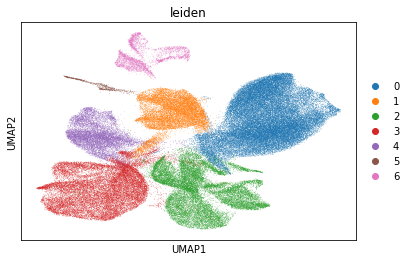

In [13]:
sc.external.pp.harmony_integrate(adata = adata, key = ["batch"])
sc.pp.neighbors(adata, n_neighbors = 15, n_pcs = 20, use_rep = 'X_pca_harmony')
sc.tl.leiden(adata, resolution = 0.1, random_state = 0, n_iterations = -1, directed = False, flavor = "igraph")
sc.tl.paga(adata)
sc.pl.paga(adata, plot = False)
sc.tl.umap(adata, init_pos = "paga")

sc.pl.umap(adata, color = 'leiden')

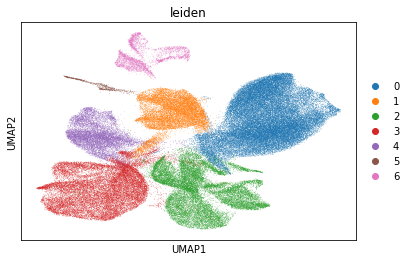

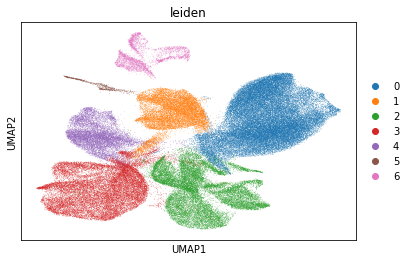

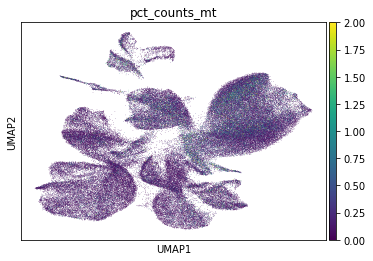

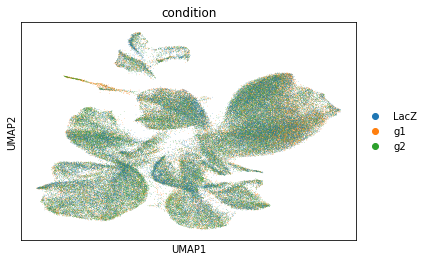

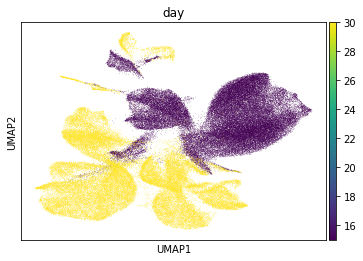

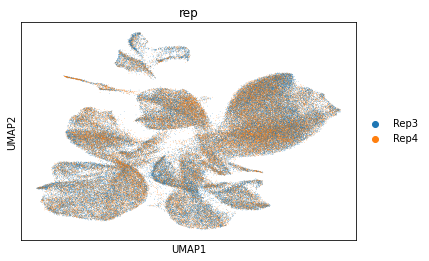

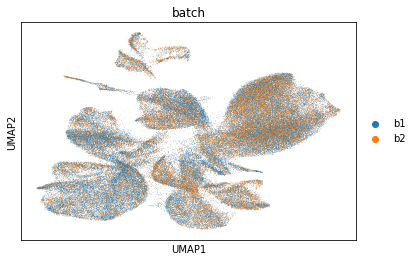

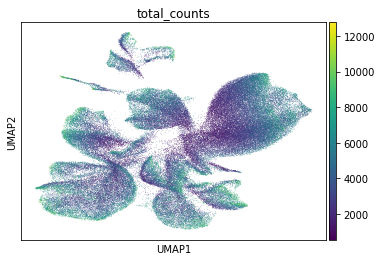

In [15]:
sc.pl.umap(adata, color = 'leiden', save = "_integration_batch_clusters.pdf")
sc.pl.umap(adata, color = "leiden", save = "_integration_clusters.pdf")
sc.pl.umap(adata, color = 'pct_counts_mt', save = "_integration_mt.pdf")
sc.pl.umap(adata, color = 'condition', save = "_integration_condition.pdf")
sc.pl.umap(adata, color = 'day', save = "_integration_day.pdf")
sc.pl.umap(adata, color = 'rep', save = "_integration_rep.pdf")
sc.pl.umap(adata, color = 'batch', save = "_integration_batch.pdf")
sc.pl.umap(adata, color = 'total_counts', save = "_integration_counts.pdf")

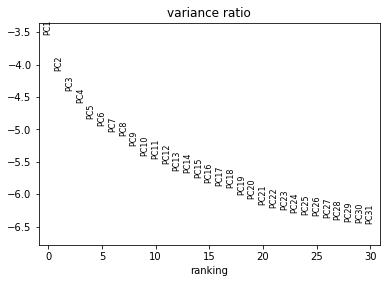

In [20]:
sc.pl.pca_variance_ratio(adata, log=True)
adata.write_h5ad("h5s/MN06_adata_umap_integration.h5")

In [21]:
df = sc.get.obs_df(adata, ['leiden', 'sample_name','condition','day','rep','batch','LINC00662','n_genes_by_counts', "total_counts", "pct_counts_mt"])
df.to_csv('../results/tables/MN06_QC.csv')
cell_meta=adata.obs.copy()
cell_meta['Barcode'] = cell_meta.index
cell_meta['UMAP1'] = adata.obsm['X_umap'][:,0]
cell_meta['UMAP2'] = adata.obsm['X_umap'][:,1]


gene_meta=adata.var.copy()
gene_meta['GeneName']=gene_meta.index
cell_meta.to_csv('../results/tables/counts_cellMeta_integrated_umap.csv',index=None)
gene_meta.to_csv('../results/tables/counts_geneMeta_integrated_umap.csv',index=None)


In [23]:
#adata = ad.read_h5ad("h5s/MN06_adata_umap_integration.h5")
with open("input_postQC.txt", "a") as fout:
    fout.write('\n'.join(adata.obs.sample_name.unique()) + "\n")

len(adata.obs.sample_name.unique())

21

In [6]:
adata = ad.read_h5ad("h5s/MN06_adata_umap_integration.h5")

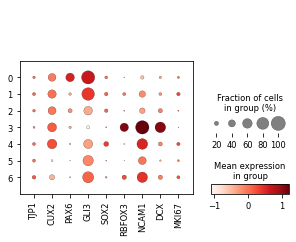

In [7]:

markers = ["TJP1", "CUX2", "PAX6", "GLI3", "SOX2", "RBFOX3", "NCAM1", "DCX", "MKI67"]
sc.pl.dotplot(adata, markers, 'leiden', save="_markers.pdf")
#dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

0
3
1
6
2
5
4


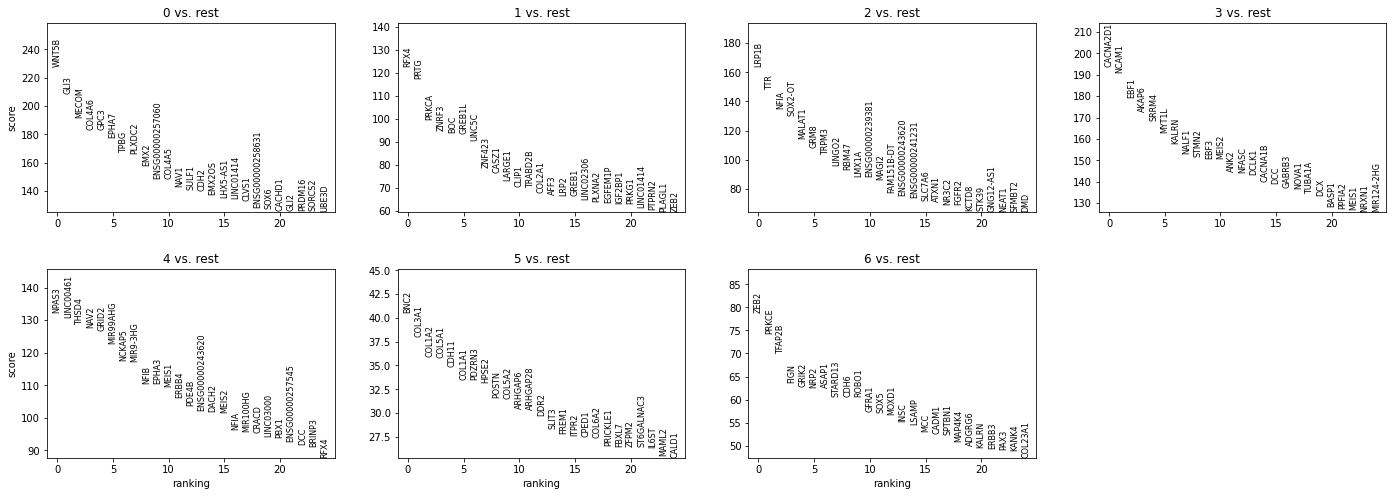

In [7]:
adata_dict_leiden_dea = {}
sc.tl.rank_genes_groups(adata, groupby = 'leiden', method="wilcoxon", key_added = "wilcoxon")
for i in adata.obs["leiden"].astype(str).unique():
    adata_dict_leiden_dea[i] = sc.get.rank_genes_groups_df(adata, group = i, key="wilcoxon")
    adata_dict_leiden_dea[i].index = adata_dict_leiden_dea[i].names
    print(i)

sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon", save = "_markers.pdf")

In [5]:
adata

AnnData object with n_obs × n_vars = 119674 × 39832
    obs: 'sample_name', 'condition', 'day', 'rep', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'n_genes', 'batch_num', 'rep_num', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rep_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'normalized', 'raw_counts', 'scaled'
    obsp: 'connectivities', 'distances'

In [6]:
cell_cycle_genes = [x.strip() for x in open('./cellcycle.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)


In [7]:
adata

AnnData object with n_obs × n_vars = 119674 × 39832
    obs: 'sample_name', 'condition', 'day', 'rep', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'n_genes', 'batch_num', 'rep_num', 'leiden', 'S_score', 'G2M_score', 'phase'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rep_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'normalized', 'raw_counts', 'scaled'
    obsp: 'connectivities', 'distances'

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


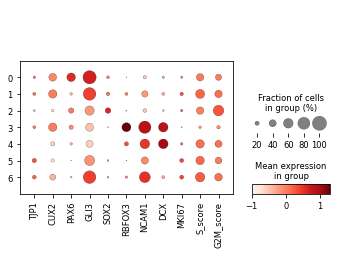

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


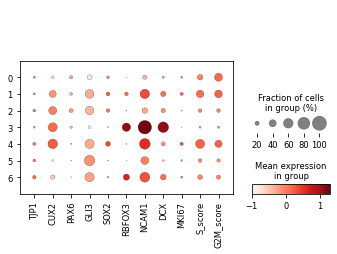

In [9]:
sc.pl.dotplot(adata[adata.obs["day"] == 15], markers + ["S_score", "G2M_score"], 'leiden', vmin = -1, vmax=1.3, save="_day15_markers.pdf")
sc.pl.dotplot(adata[adata.obs["day"] == 30], markers + ["S_score", "G2M_score"], 'leiden', vmin = -1, vmax=1.3, save="_day30_markers.pdf")


In [24]:
adata.obs["cellcycle_score"] = adata.obs["S_score"] + adata.obs["G2M_score"]

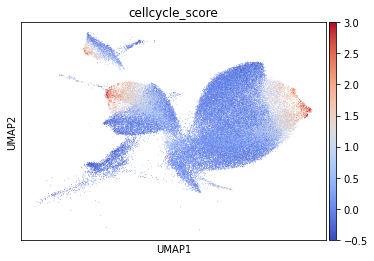

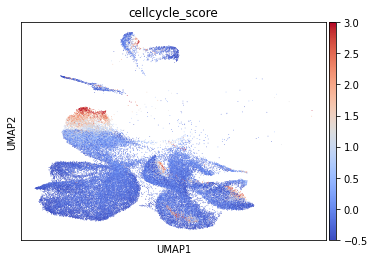

In [28]:
sc.pl.umap(adata[adata.obs["day"] == 15], color = ["cellcycle_score"], cmap = "coolwarm", vmax = 3, vmin = -0.5, save = "_cellcycle_day15.pdf")
sc.pl.umap(adata[adata.obs["day"] == 30], color = ["cellcycle_score"], cmap = "coolwarm", vmax = 3, vmin = -0.5, save = "_cellcycle_day30.pdf")

In [29]:
df = sc.get.obs_df(adata, ['leiden', 'sample_name','condition','day','rep','batch', "EPHB2","VAV2","COL3A1","DAB2IP","BCR","CELSR1","SIPA1L3", "CDH4","CUX2","PRKCZ","ST8SIA2", "SHANK2","SLC9A1","SMAD7","KIRREL1", "TBCD","RAI1","SKI","CACNG4","CASTOR2", "TEAD2","KAZN","NXN","CMIP","SSBP3"])
df.to_csv('../results/tables/MN06_upreg_genes_GSEA_core.csv')

In [5]:
adata

AnnData object with n_obs × n_vars = 119674 × 39832
    obs: 'sample_name', 'condition', 'day', 'rep', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'n_genes', 'batch_num', 'rep_num', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rep_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'normalized', 'raw_counts', 'scaled'
    obsp: 'connectivities', 'distances'

In [11]:
axon_genes = ["NIBAN2", "NOTCH1", "GLI2", "CDH4", "EPHB2", "PITPNA", "SEMA6B", "SEMA3F", "BCL2", "DNM2", "PTK7", "NECTIN1", "MARK2", "UNC5A", "NOTCH2", "NFASC", "SLIT1", "FGFR2", "PLEKHG4B", "TAOK2", "ARHGAP35", "RGMA", "ABL1", "NTN1", "SZT2", "STXBP1", "MEGF8", "TIAM1", "SEMA4D", "KIAA1755", "TRAK1", "UNC5B", "PLXNA2", "DSCAM", "APBB1", "SEMA4B", "NOVA2", "BAIAP2", "ECE1", "DISC1", "KALRN", "B4GALT5", "SMURF1", "VCL", "PTPRM", "RAB10", "IGF1R", "SPTBN4", "LIMK1", "FSTL4", "SMO", "MACF1", "APBB2", "MAP6", "DAG1", "EPHA10", "CYFIP2", "OPHN1", "TIAM2", "ADAM17", "SIN3A", "EXT1", "MAP2K1", "LHX2", "PSEN1", "SPG11", "SYNGAP1", "PARD3", "NUMBL", "TRIO", "SOS1", "PLXNA3", "NLGN3", "DPYSL5", "WDR47", "PTPN11", "AUTS2", "RAB21", "SEMA4A", "NCAM1", "BMPR2", "DIP2B", "FGF13", "PTK2", "VASP", "SIPA1L1", "GOLGA4", "SNAP25", "PAFAH1B1", "DSCAML1", "ADNP", "PTPRS", "TRIM46", "EPHB1", "SEMA6A", "PLXNC1", "DCLK1", "PRKCQ", "KLF7", "BCL11B", "CTNNA2", "SCN11A", "BRSK1", "SLIT3", "PLXNA4", "SEMA6D", "SEMA5A", "HDAC6", "KIF13B", "MAP1S", "ADARB1", "SEMA3D", "FLRT2", "PAK3", "NIN", "NUMB", "NTN4", "ATL1", "PAK1", "FYN", "USP9X", "LMX1A", "SPART", "TTL", "SPAST", "APLP2", "ARHGEF28", "RUFY3", "NTNG2", "DCC", "RPS6KA5", "ATP8A2", "CNTN6", "TBCE", "PALLD", "BMPR1B", "NTRK2", "RET", "NTNG1", "KIF5B", "ARHGAP4", "LRP4", "DRAXIN", "NEO1", "MAP3K13", "PLXNB1", "NEXN", "NOTCH3", "PICALM", "MAP1B", "PLXNA1", "FN1", "MCF2", "GLI3", "ERBB2", "CDKL5", "NELL2", "BRAF", "PTCH1", "NDEL1", "CNTNAP1", "CDH11", "WNT7B", "ADCY1", "RAB8A", "CNTN4", "TNR", "B4GALT6", "KIF5A", "STK25", "GBX1", "ROBO4", "USP33", "RTN4RL1", "FIGNL2", "NMNAT2", "VASH2", "PTPRF", "KREMEN1", "STK24", "LRIG2", "TBC1D24", "CTNNA1", "TSPAN2", "INPP5F", "CAMSAP2", "GRM7", "JAK2", "TRIM32", "BMP7", "TNC", "KIAA0319", "NRXN3", "EPHA3", "PTPRO", "ROBO1", "CHN1", "MAPK8IP3", "CNTN5", "LAMA2", "COBL", "NRXN1", "BOC", "LGI1", "DAB1", "GPM6B", "TNFRSF21", "NCAM2", "SEMA4G", "MATN2", "EDNRA", "UST", "ARHGEF40", "DRD2", "DHFR", "CNTN1", "UNC5D", "CHL1", "CFAP74", "ODAD4", "DNAAF1", "CCDC65", "ODAD1", "TTLL1", "CFAP46", "TTLL3", "DNAH1", "SPAG17", "CCDC40", "HYDIN", "NISCH", "RSPH9", "GAS8", "CFAP100", "DNAAF5", "CFAP44", "ARMC2", "STK36", "DRC1", "FSIP2", "CFAP58", "CLUAP1", "DNAH5", "TTC12", "LRGUK", "DNAI4", "ODAD2", "DNAI1", "DNAH7", "NEURL1", "CFAP91", "CFAP157", "SPEF2", "BBOF1", "DNAI2", "JHY", "CC2D2A", "DNAH2", "RSPH4A", "DNAI3", "CFAP73", "SPAG6", "DRC7", "DNAH17", "IQCG", "LRRC43", "DNAAF8", "TOGARAM1"]


In [10]:
adata

AnnData object with n_obs × n_vars = 119674 × 39832
    obs: 'sample_name', 'condition', 'day', 'rep', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'n_genes', 'batch_num', 'rep_num', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rep_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'normalized', 'raw_counts', 'scaled'
    obsp: 'connectivities', 'distances'

In [12]:
df = sc.get.obs_df(adata, ['leiden', 'sample_name','condition','day','rep','batch'] + axon_genes, layer="normalized")
df.to_csv('../results/tables/MN06_axon_genes_GSEA_core.csv')